In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 119.2745 - val_loss: 112.0773
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.2780 - val_loss: 74.0402
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.8964 - val_loss: 30.6865
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.0431 - val_loss: 14.2134
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0037 - val_loss: 6.9681
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8097 - val_loss: 4.7829
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4710 - val_loss: 4.2041
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4007 - val_loss: 4.0836
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1908 - val_loss: 3.9337
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2842 - val_loss: 3.9097
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0261 - val_loss: 3.8748
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1651 - val_los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 120.4000 - val_loss: 115.3176
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.9878 - val_loss: 82.5300
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.5186 - val_loss: 34.8071
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9277 - val_loss: 33.7875
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7866 - val_loss: 24.5085
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8904 - val_loss: 21.2147
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7737 - val_loss: 13.9734
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6961 - val_loss: 10.3117
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5530 - val_loss: 7.9575
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1600 - val_loss: 6.2282
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0760 - val_loss: 5.5025
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9920 - val_

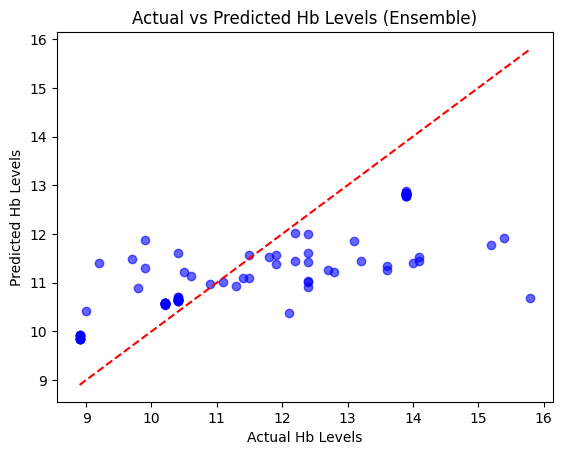

In [76]:
data = pd.read_csv('data_new.csv')
labels = pd.read_csv('label.csv')
dataset = pd.merge(data, labels, on='Blood Sample ID')

# Group 1: Combine RGB values for each body part
dataset['Combined_Left_Eye'] = dataset[['Average left eye R', 'Average left eye G', 'Average left eye B']].mean(axis=1)
dataset['Combined_Left_Palm'] = dataset[['Average left palm R', 'Average left palm G', 'Average left palm B']].mean(axis=1)
dataset['Combined_Right_Nail'] = dataset[['Average right nail R', 'Average right nail G', 'Average right nail B']].mean(axis=1)

# Group 2: Group by color channel across body parts
dataset['Channel_R'] = dataset[['Average left eye R', 'Average left palm R', 'Average right nail R']].mean(axis=1)
dataset['Channel_G'] = dataset[['Average left eye G', 'Average left palm G', 'Average right nail G']].mean(axis=1)
dataset['Channel_B'] = dataset[['Average left eye B', 'Average left palm B', 'Average right nail B']].mean(axis=1)

y = dataset['Haemoglobin (in mg/dl)']

# Split the data for both groups
# Group1
X_group1 = dataset[['Combined_Left_Eye', 'Combined_Left_Palm', 'Combined_Right_Nail']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_group1, y, test_size=0.2, random_state=124)

# Group2
X_group2 = dataset[['Channel_R', 'Channel_G', 'Channel_B']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_group2, y, test_size=0.2, random_state=124)

# Normalize features
X_train1, X_test1 = X_train1 / 255.0, X_test1 / 255.0
X_train2, X_test2 = X_train2 / 255.0, X_test2 / 255.0

# Reshape data for CNN input
X_train1_cnn = X_train1.values.reshape(-1, 3, 1, 1)
X_test1_cnn = X_test1.values.reshape(-1, 3, 1, 1)
X_train2_cnn = X_train2.values.reshape(-1, 3, 1, 1)
X_test2_cnn = X_test2.values.reshape(-1, 3, 1, 1)

def build_and_train_cnn(X_train, y_train, X_test, y_test):
    cnn_model = Sequential([
        Conv2D(16, kernel_size=(2, 1), activation='relu', input_shape=(3, 1, 1)),
        BatchNormalization(),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    cnn_model.compile(optimizer='adam', loss='mse')
    cnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.2)
    feature_extractor = Sequential(cnn_model.layers[:-1])
    X_train_features = feature_extractor.predict(X_train)
    X_test_features = feature_extractor.predict(X_test)
    return X_train_features, X_test_features

X_train1_features, X_test1_features = build_and_train_cnn(X_train1_cnn, y_train1, X_test1_cnn, y_test1)

X_train2_features, X_test2_features = build_and_train_cnn(X_train2_cnn, y_train2, X_test2_cnn, y_test2)

def train_xgboost(X_train, y_train, X_test, y_test):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {
        'objective': 'reg:squarederror',
        'learning_rate': 0.01,
        'max_depth': 9,
        'colsample_bytree': 0.6,
        'subsample': 0.6,
        'seed': 124
    }
    model = xgb.train(params, dtrain, num_boost_round=100)
    y_pred = model.predict(dtest)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return y_pred, r2, rmse

y_pred1, r2_1, rmse_1 = train_xgboost(X_train1_features, y_train1, X_test1_features, y_test1)
print(f"Group 1 R^2: {r2_1}, RMSE: {rmse_1}")

y_pred2, r2_2, rmse_2 = train_xgboost(X_train2_features, y_train2, X_test2_features, y_test2)
print(f"Group 2 R^2: {r2_2}, RMSE: {rmse_2}")

final_pred = (y_pred1 + y_pred2) / 2
final_r2 = r2_score(y_test1, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test1, final_pred))
print(f"Ensemble R^2: {final_r2}, RMSE: {final_rmse}")

plt.scatter(y_test1, final_pred, color='blue', alpha=0.6)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], color='red', linestyle='--')
plt.xlabel("Actual Hb Levels")
plt.ylabel("Predicted Hb Levels")
plt.title("Actual vs Predicted Hb Levels (Ensemble)")
plt.show()

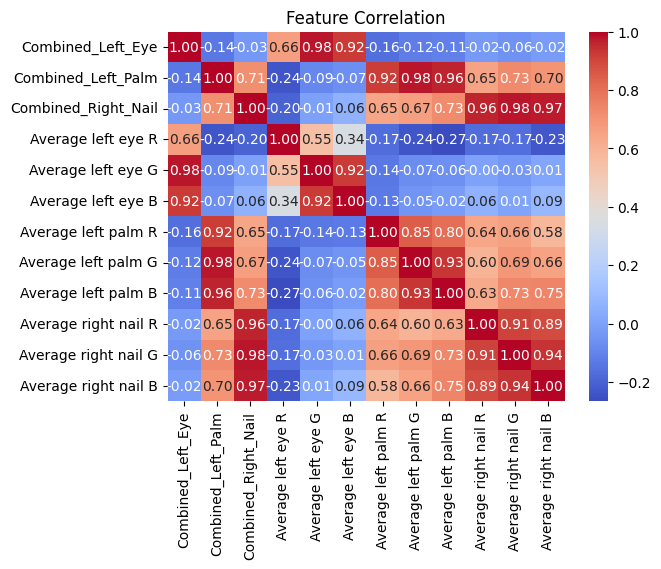

R^2: 0.6529580781896867
RMSE: 1.0949354925270882


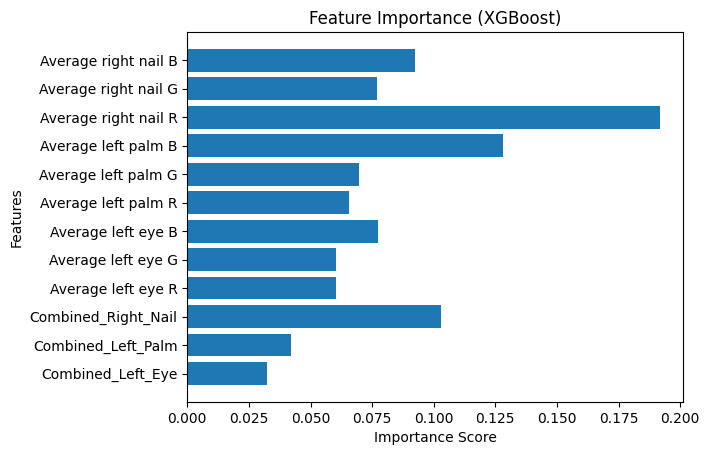

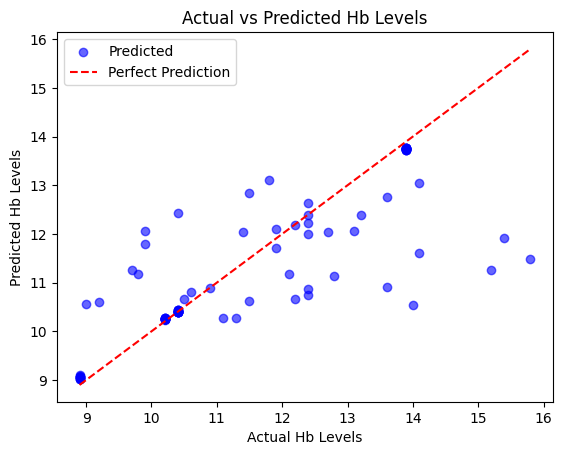

In [63]:
data = pd.read_csv('data_new.csv')
labels = pd.read_csv('label.csv')
dataset = pd.merge(data, labels, on='Blood Sample ID')

dataset['Combined_Left_Eye'] = (dataset['Average left eye R'] +
                                dataset['Average left eye G'] +
                                dataset['Average left eye B']) / 3
dataset['Combined_Left_Palm'] = (dataset['Average left palm R'] +
                                 dataset['Average left palm G'] +
                                 dataset['Average left palm B']) / 3
dataset['Combined_Right_Nail'] = (dataset['Average right nail R'] +
                                  dataset['Average right nail G'] +
                                  dataset['Average right nail B']) / 3

X_combined = dataset[['Combined_Left_Eye', 'Combined_Left_Palm', 'Combined_Right_Nail',
                      'Average left eye R', 'Average left eye G', 'Average left eye B',
                      'Average left palm R', 'Average left palm G', 'Average left palm B',
                      'Average right nail R', 'Average right nail G', 'Average right nail B']]

y = dataset['Haemoglobin (in mg/dl)']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=124)

corr_matrix = X_combined.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=9, n_estimators=300,
                             colsample_bytree=0.6, subsample=0.6, random_state=124)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

feature_importances = xgb_model.feature_importances_
plt.barh(X_combined.columns, feature_importances)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Hb Levels")
plt.ylabel("Predicted Hb Levels")
plt.title("Actual vs Predicted Hb Levels")
plt.legend()
plt.show()

In [3]:
xgb_model.save_model("xgb_model.json")
print("Model saved as xgb_model.json")

Model saved as xgb_model.json


In [6]:
xgb_model = xgb.XGBRegressor()
xgb_model.load_model("xgb_model.json")
print("Model loaded successfully!")

Model loaded successfully!


In [8]:
input_data = {
    'Average left eye R': 2.3,
    'Average left eye G': 3.5,
    'Average left eye B': 1.8,
    'Average left palm R': 15.2,
    'Average left palm G': 18.4,
    'Average left palm B': 14.3,
    'Average right nail R': 5.4,
    'Average right nail G': 4.8,
    'Average right nail B': 4.9
}

def preprocess_input(input_dict):
    combined_left_eye = (input_dict['Average left eye R'] +
                         input_dict['Average left eye G'] +
                         input_dict['Average left eye B']) / 3
    combined_left_palm = (input_dict['Average left palm R'] +
                          input_dict['Average left palm G'] +
                          input_dict['Average left palm B']) / 3
    combined_right_nail = (input_dict['Average right nail R'] +
                           input_dict['Average right nail G'] +
                           input_dict['Average right nail B']) / 3

    features = np.array([
        combined_left_eye,
        combined_left_palm,
        combined_right_nail,
        input_dict['Average right nail R'],
        input_dict['Average right nail G'],
        input_dict['Average right nail B']
    ]).reshape(1, -1)  
    return features

processed_input = preprocess_input(input_data)

predicted_hb_level = xgb_model.predict(processed_input)
print(f"Predicted Hemoglobin Level: {predicted_hb_level[0]:.2f} mg/dl")

Predicted Hemoglobin Level: 12.74 mg/dl


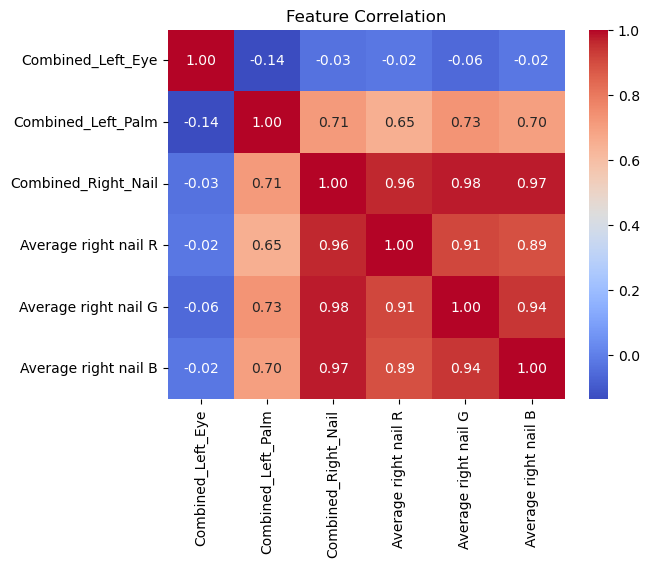

R^2: 0.6733905682899832
RMSE: 1.06221376460637


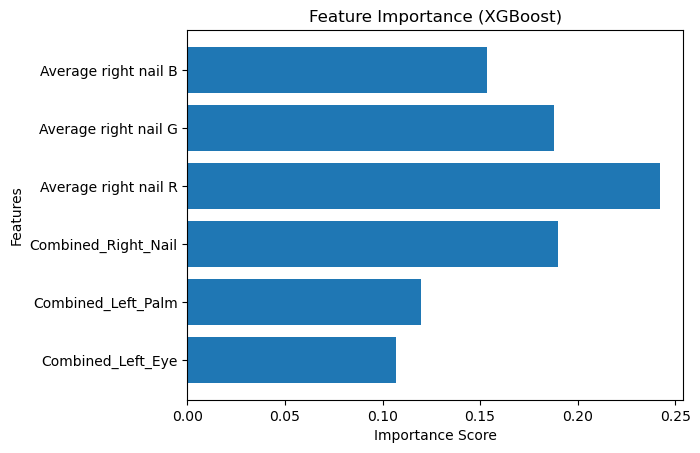

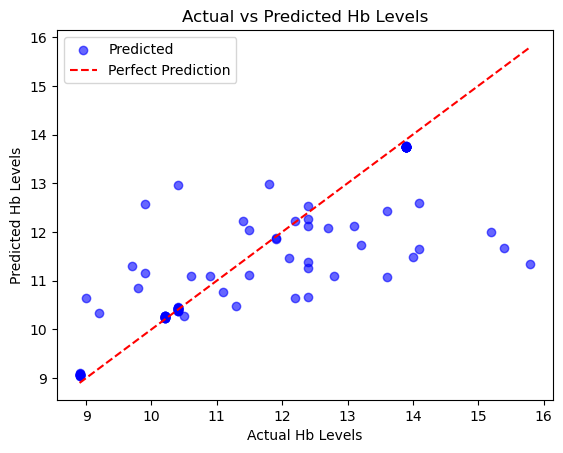

In [1]:
data = pd.read_csv('data_new.csv')
labels = pd.read_csv('label.csv')
dataset = pd.merge(data, labels, on='Blood Sample ID')

dataset['Combined_Left_Eye'] = (dataset['Average left eye R'] +
                                dataset['Average left eye G'] +
                                dataset['Average left eye B']) / 3
dataset['Combined_Left_Palm'] = (dataset['Average left palm R'] +
                                 dataset['Average left palm G'] +
                                 dataset['Average left palm B']) / 3
dataset['Combined_Right_Nail'] = (dataset['Average right nail R'] +
                                  dataset['Average right nail G'] +
                                  dataset['Average right nail B']) / 3

X_combined = dataset[['Combined_Left_Eye', 'Combined_Left_Palm', 'Combined_Right_Nail',
                      'Average right nail R', 'Average right nail G', 'Average right nail B']]

y = dataset['Haemoglobin (in mg/dl)']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=124)

corr_matrix = X_combined.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.01, max_depth=9, n_estimators=300,
                             colsample_bytree=0.6, subsample=0.6, random_state=124)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
feature_importances = xgb_model.feature_importances_
plt.barh(X_combined.columns, feature_importances)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Hb Levels")
plt.ylabel("Predicted Hb Levels")
plt.title("Actual vs Predicted Hb Levels")
plt.legend()
plt.show()